## deepDegron

In this notebook, we examine genes that contain an enichment of degron-loss mutations according to deepDegron.

In [2]:
# import needed packages
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import scipy.stats as stats
import matplotlib as mpl
from matplotlib_venn import venn2, venn2_circles
mpl.rcParams['pdf.fonttype'] = 42
import utils
import rpy2
%load_ext rpy2.ipython

### C-terminal degron analysis

We first see whether c-terminal degrons may be preferentially lost due to mutations in cancer.

In [14]:
df_list = []
mypattern = 'data/GPS/cterm_deepDegron_output_v2/*.txt'
for f in glob.glob(mypattern):
    ctype = os.path.basename(f)[:-4]
    tmp = pd.read_csv(f, sep='\t').rename(columns={'delta_reg_potential': 'delta_degron_potential'})
    tmp["ID"] = tmp['gene'] + '_' + ctype
    df_list.append(tmp)

# prepare result df
result_df = pd.concat(df_list)
result_df.loc[result_df['pvalue']==0, 'pvalue'] = 1. / 10000
result_df['-log10(pvalue)'] = -np.log10(result_df['pvalue'])

# show top results
is_signif = result_df['qvalue']<0.1
is_loss = result_df['delta_degron_potential'] < -1
result_df[is_signif & is_loss].sort_values('delta_degron_potential')

,gene,delta_degron_potential,pvalue,qvalue,ID,-log10(pvalue)
9096,GATA3,-25.663700,0.0001,0.000000,GATA3_PANCAN,4.0
7255,GATA3,-23.088945,0.0001,0.000000,GATA3_BRCA,4.0
14693,PPM1D,-7.401094,0.0001,0.064103,PPM1D_PANCAN,4.0
16953,PRRG1,-5.565904,0.0001,0.000000,PRRG1_UCEC,4.0
3736,PIK3CA,-4.210133,0.0001,0.000000,PIK3CA_PANCAN,4.0
4909,NIPBL,-3.087368,0.0001,0.000000,NIPBL_UCEC,4.0
5298,BEND3,-2.076249,0.0001,0.000000,BEND3_UCEC,4.0
6996,DUSP16,-1.619639,0.0001,0.000000,DUSP16_COAD,4.0
8903,B4GALNT4,-1.610622,0.0001,0.000000,B4GALNT4_UCEC,4.0
5270,NPM1,-1.500067,0.0001,0.000000,NPM1_PANCAN,4.0


We next plot the results for every gene across all cancer types.

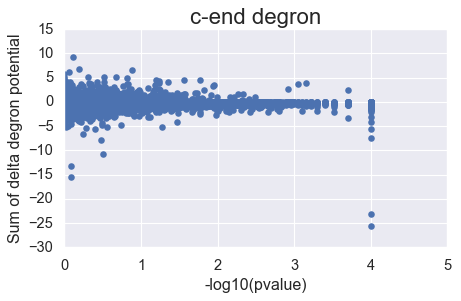

In [4]:
with sns.plotting_context('notebook', font_scale=1.2):
    sns.scatterplot('-log10(pvalue)', 'delta_degron_potential', data=result_df, linewidth=0, s=35)
    plt.gca().set_ylabel('Sum of delta degron potential')
    plt.gca().set_xlim(0, 5)
    plt.gcf().set_size_inches(6, 4)
    plt.title('c-end degron', size=20)
    plt.tight_layout()
    #plt.savefig('figures/cterm_signif_genes.png')

### N-terminal analysis

We next wanted to see whether n-terminal degrons may be preferentially lost due to mutations in cancer.

In [10]:
df_list = []
mypattern = 'data/GPS/nterm_deepDegron_output/*.txt'
for f in glob.glob(mypattern):
    ctype = os.path.basename(f)[:-4]
    tmp = pd.read_csv(f, sep='\t').rename(columns={'delta_reg_potential': 'delta_degron_potential'})
    tmp["ID"] = tmp['gene'] + '_' + ctype
    df_list.append(tmp)

# prepare result df
result_df = pd.concat(df_list)
result_df.loc[result_df['pvalue']==0, 'pvalue'] = 1. / 10000
result_df['-log10(pvalue)'] = -np.log10(result_df['pvalue'])

# show top results
is_signif = result_df['qvalue']<0.1
is_loss = result_df['delta_degron_potential'] < -1
result_df[is_signif & is_loss].sort_values('delta_degron_potential')

,gene,delta_degron_potential,pvalue,qvalue,ID,-log10(pvalue)


Interestingly, as opposed to c-end degrons, we find no significant hits for n-end degrons.

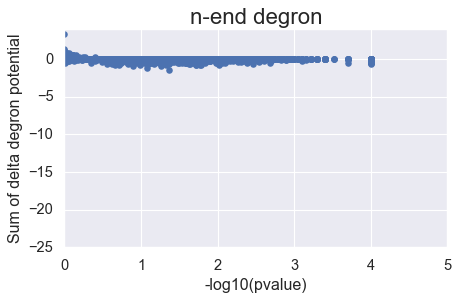

In [11]:
with sns.plotting_context('notebook', font_scale=1.2):
    sns.scatterplot('-log10(pvalue)', 'delta_degron_potential', data=result_df, linewidth=0, s=35)
    plt.gca().set_ylabel('Sum of delta degron potential')
    plt.gca().set_xlim(0, 5)
    plt.gca().set_ylim(-25, 4)
    plt.gcf().set_size_inches(6, 4)
    plt.title('n-end degron', size=20)
    plt.tight_layout()
    plt.savefig('figures/nterm_signif_genes.png')

### Suplementary tables

In [15]:
# filter dataset
is_loss = result_df['delta_degron_potential']<-1
is_signif = result_df['qvalue']<0.1
supp_table = result_df[is_loss & is_signif].sort_values('delta_degron_potential').copy()

# format output
supp_table['cancer type'] = supp_table['ID'].str.split('_', expand=True)[1]
supp_table = supp_table.rename(columns={'delta_degron_potential': 'delta degron potential'})
out_cols = ['gene', 'cancer type', 'delta degron potential', 'pvalue', 'qvalue']
supp_table = supp_table[out_cols]

# save output
supp_table.to_excel('tables/TableS8.xlsx', sheet_name='deepDegron', index=False)